In [449]:
import random
import numpy as np


def rk4(dv,v,n,t,dt,e1,a,w):
    v1=[]
    k1=[]
    k2=[]
    k3=[]
    k4=[]
    for x in range(0, n):
        v1.append(x)
        k1.append(x)
        k2.append(x)
        k3.append(x)
        k4.append(x)

    dt2=dt/2.0
    dt6=dt/6.0
    for x in range(0, n):
        v1[x]=v[x]
    dv(v1, k1,e1,a,w)
    for x in range(0, n):
        v1[x]=v[x]+dt2*k1[x]
    dv(v1, k2,e1,a,w)     
    for x in range(0, n):
        v1[x]=v[x]+dt2*k2[x]
    dv(v1, k3,e1,a,w)
    for x in range(0, n):
        v1[x]=v[x]+dt*k3[x]
    dv(v1, k4,e1,a,w)
    for x in range(0, n):
        v1[x]=v[x]+dt*k4[x]        
    for x in range(0, n):
        v[x]=v[x]+dt6*(2.0*(k2[x]+k3[x])+k1[x]+k4[x])
    return v

def ecuaciones(v, dv,eps1,A,omega):
    """Defino la ecuación diferencial que quiero ajustar"""
    x=v[0]
    y=v[1]
    z=v[2]
    #eps1, A, omega = 0.2,10,4.7
    eps2 = 1
    A=A*(1+4.0*random.normalvariate(0,0.5))
    dv[0]=y
    dv[1]=x-y-x*x*x+x*y+eps1+(eps2)*x*x+A*np.cos(z)
    dv[2]=omega
    return dv


def dist(x,y,z,t1,t2):
    v1 = np.array([x[t1], y[t1], z[t1]])
    v2 = np.array([x[t2], y[t2], z[t2]])
    return np.linalg.norm(v1-v2)

def embedding(x,T):
    x1d=np.zeros(len(x))
    x2d=np.zeros(len(x))
    x0d=np.zeros(len(x))
    tau = int(T/24)
    for i in range(30,len(x)):
        x1d[i]=-x[i-tau]
        x2d[i]=-x[i-2*tau]
        x0d[i]=-x[i]
    return x0d,x1d,x2d

def close_returns(x,y,z,T):
    cr =  8 #cr de close returns
    # eps = 0.3
    eps = np.abs(np.max(x)-np.min(x))*0.05
    #print('eps2: ',eps2)
    randint1 = 1000
    x,y,z = embedding(x,T)
    for k in range(10):
        if (dist(x,y,z,int(T*k)+randint1,randint1) < eps):
            cr = k
        else:
            continue
    return cr

In [450]:
def integrar_cr(params):
    a = params[0]
    w = params[1]
    n=3 #Cantidad de variables   
    v=[]
    for x in range(0, n):
        v.append(x)

    v[0]=1.
    v[1]=3.
    v[2]=2.
    #DT
    T = 2* np.pi / w
    dt = 2* np.pi /2000 / w
    num_muestras = T/dt
    t=0.0
    t_pre=0.0
    t_max=2000.0
    x=[]
    y=[]
    z=[]
    cont = 0
    while t<t_max:
        eps1 = 0.25
        rk4(ecuaciones,v,n,t,dt,eps1,a,w)
        t+=dt
        x.append(cont)  #ACÁ ARMO LOS ARREGLOS DE X Y Z CON LOS RESULTADOS QUE VA LARGANDO "V"
        y.append(cont)
        z.append(cont)
        x[cont]=v[0]
        y[cont]=v[1]
        z[cont]=v[2]
        cont=cont+1

    x = x[100*int(T):]
    y = y[100*int(T):]
    z = z[100*int(T):]
    cr = close_returns(x,y,z,num_muestras)
    #print(num_muestras)
    return cr

def integrar(params):
    a = params[0]
    w = params[1]
    n=3 #Cantidad de variables   
    v=[]
    for x in range(0, n):
        v.append(x)

    v[0]=1.
    v[1]=3.
    v[2]=2.
    #DT
    T = 2* np.pi / w
    dt = 2* np.pi /2000 / w
    num_muestras = T/dt
    t=0.0
    t_pre=0.0
    t_max=2000.0
    x=[]
    y=[]
    z=[]
    cont = 0
    while t<t_max:
        eps1 = 0.25
        rk4(ecuaciones,v,n,t,dt,eps1,a,w)
        t+=dt
        x.append(cont)  #ACÁ ARMO LOS ARREGLOS DE X Y Z CON LOS RESULTADOS QUE VA LARGANDO "V"
        y.append(cont)
        z.append(cont)
        x[cont]=v[0]
        y[cont]=v[1]
        z[cont]=v[2]
        cont=cont+1
        
    x = x[100*int(T):]
    y = y[100*int(T):]
    z = z[100*int(T):]
    cr = close_returns(x,y,z,num_muestras)
    #print(num_muestras)
    return x,y,z,cr

In [451]:
A = np.arange(9,11,.1)
W = np.arange(3,5,.1)
X, Y = np.meshgrid(W,A)

In [452]:
#!/usr/bin/env python3
import itertools
import multiprocessing

#Generate a list of tuples where each Tuple is a combination of parameters.
#The list will contain all possible combinations of parameters.
paramlist = list(itertools.product(A,W))

In [453]:
#Generate processes equal to the number of cores
pool = multiprocessing.Pool()

#Distribute the parameter sets evenly across the cores
cr  = pool.map(integrar_cr,paramlist)
cr = np.array(cr).reshape([len(A),len(W)])
df = pd.DataFrame(cr, index=A, columns=W) 


3.5000000000000004 9.499999999999998


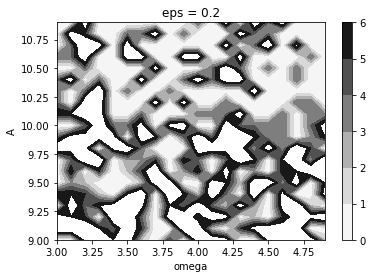

In [454]:
from scipy.interpolate import griddata
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm
import numpy as np 
import pandas as pd
G = np.array(arnold)

X, Y = np.meshgrid(df.index.values,df.columns.values)

levels = MaxNLocator(nbins=7).tick_values(0, 6)
cmap = plt.get_cmap('Greys')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True) 

#plt.contour(X,Y,G.T,cmap=cmap)
plt.contourf(Y,X,df.values,levels=levels,cmap=cmap)
plt.xlabel('omega')
plt.ylabel('A')
plt.title('eps = 0.2')
plt.colorbar()
print(W[5], A[5])

## Pruebas

Pruebas

4


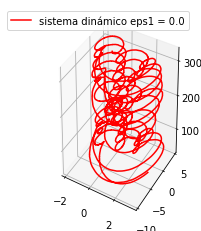

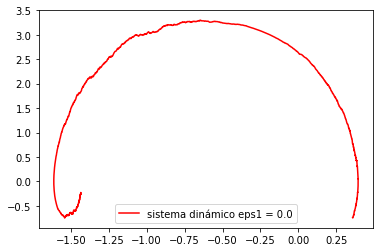

In [429]:
x,y,z,cr = integrar((10.5,4.8))
print(cr)

fig=plt.figure()
ax=fig.add_subplot(121, projection= '3d')

ax.plot(x[5400:100000],y[5400:100000], z[5400:100000], 'r',label="sistema dinámico eps1 = 0.0")

plt.legend()
plt.show()

fig=plt.figure()
ax=fig.add_subplot(111)
N = 6
T = 365
ax.plot(x[15400:15400+int(N*T)],y[15400:15400+int(N*T)] ,'r',label="sistema dinámico eps1 = 0.0")

plt.legend()
plt.show()

In [430]:
import numpy as np
import random

def rk4(dv,v,n,t,dt,e1):
    v1=[]
    k1=[]
    k2=[]
    k3=[]
    k4=[]
    for x in range(0, n):
        v1.append(x)
        k1.append(x)
        k2.append(x)
        k3.append(x)
        k4.append(x)

    dt2=dt/2.0
    dt6=dt/6.0
    for x in range(0, n):
        v1[x]=v[x]
    dv(v1, k1,e1)
    for x in range(0, n):
        v1[x]=v[x]+dt2*k1[x]
    dv(v1, k2,e1)     
    for x in range(0, n):
        v1[x]=v[x]+dt2*k2[x]
    dv(v1, k3,e1)
    for x in range(0, n):
        v1[x]=v[x]+dt*k3[x]
    dv(v1, k4,e1)
    for x in range(0, n):
        v1[x]=v[x]+dt*k4[x]        
    for x in range(0, n):
        v[x]=v[x]+dt6*(2.0*(k2[x]+k3[x])+k1[x]+k4[x])
    return v


def ecuaciones(v, dv,eps1):
    """Defino la ecuación diferencial que quiero ajustar"""
    x=v[0]
    y=v[1]
    z=v[2]
    A, eps2,omega = 10,1,4.7 #Cerca de la lengua de arnold de periodo 4, pero donde hay caos
    #A=A*(1+4.0*random.normalvariate(0,0.5))
    dv[0]=y
    dv[1]=x-y-x*x*x+x*y+eps1+(eps2)*x*x+A*np.cos(z)
    dv[2]=omega
    return dv

for m in range(1):
    n=3 #Cantidad de variables   
    v=[]
    for x in range(0, n):
        v.append(x)

    v[0]=1.*(1+0.5*random.normalvariate(0,0.5))
    v[1]=3.*(1+0.5*random.normalvariate(0,0.5))
    v[2]=2.*(1+0.5*random.normalvariate(0,0.5))
    dt=0.0036
    t=0.0
    t_pre=0.0
    t_max=1000.0
    x=[]
    y=[]
    z=[]
    cont=0
    while t<t_max:
        eps1 = 0.25
        rk4(ecuaciones,v,n,t,dt,eps1)
        t+=dt
        x.append(cont)  #ACÁ ARMO LOS ARREGLOS DE X Y Z CON LOS RESULTADOS QUE VA LARGANDO "V"
        y.append(cont)
        z.append(cont)
        x[cont]=v[0]
        y[cont]=v[1]
        z[cont]=v[2]
        cont=cont+1

    x = x[:60000]
    np.savetxt('Nino_cerca_de_periodo4_sin_ruido_'+str(m)+'.txt', x)

T = 2* np.pi /4.7
num_muestras = int(T/dt)
cr = close_returns(x,y,z,num_muestras)
print(cr)

4


In [431]:
x[6000]


0.41549332019896296

In [432]:
x[6000+int(num_muestras*4)]

0.2646657263275856

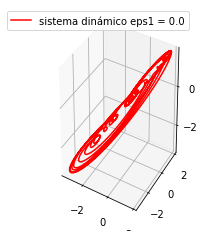

In [433]:
x1d=np.zeros(len(x))
x2d=np.zeros(len(x))
x0d=np.zeros(len(x))
for i in range(30,len(x)):
    x1d[i]=-x[i-15]
    x2d[i]=-x[i-30]
    x0d[i]=-x[i]

fig=plt.figure()
ax=fig.add_subplot(121, projection= '3d')

ax.plot(x0d[5000:14000],x1d[5000:14000], x2d[5000:14000], 'r',label="sistema dinámico eps1 = 0.0")

plt.legend()
plt.show()

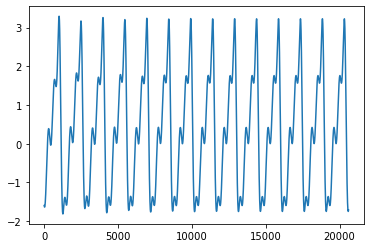

In [436]:
plt.plot(x[15000:100*356])

## Plot

In [ ]:
#Read data
import pandas as pd
import numpy as np
#Plot
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

la = pd.read_csv('/home/julia.mindlin/Materias_UBA/dinamica_nolineal/ENSO/arnold_2023/final/lengua_7.0_11.989999999999894_3.0_5.989999999999936.csv')
#la  = pd.read_csv('/home/julia.mindlin/Materias_UBA/dinamica_nolineal/ENSO/arnold_2023/final/lengua_7.0_11.899999999999983_3.0_5.900000000000002.csv')
#Ticks cada 20 
A_array_lab = np.round(np.arange(7,12.5,0.01*50),1)
omega_array_lab = np.round(np.arange(3,6.5,0.01*50),1)
#Ticks cada 20 
A_array_tick = np.round(np.arange(0,550,50))
omega_array_tick = np.round(np.arange(0,350,50))

la = la.iloc[::-1]

# Create a heatmap
fig = plt.figure()
cmap = ListedColormap(sns.color_palette("tab10", n_colors=7))
sns.heatmap(la, annot=False, cmap=cmap, fmt='.2f',vmin=0, vmax=6, cbar_kws={'ticks': range(0, 6)},xticklabels=omega_array_lab, yticklabels=A_array_lab)
# Set the custom tick positions
plt.xticks(omega_array_tick, omega_array_lab,rotation=0)
plt.yticks(A_array_tick, A_array_lab)